In [1]:
import io, sys
import numpy as np 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def load_vectors(filename):
    fin = io.open(filename, 'r', encoding='utf-8', newline='\n')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = np.asarray([float(x) for x in tokens[1:]])
    return data

In [3]:
word_vectors = load_vectors('wiki.en.vec')

In [4]:
vectors = []

for vector in word_vectors.values():
    vectors.append(vector)

eigenwords = np.stack(vectors,axis=-1)
eigenwords.shape

(300, 12000)

In [5]:
# delete few words from the eigen words, latter we show how we able to construct them from the eigen modes

eigenwords = np.delete(eigenwords,np.s_[:3],axis=1)
eigenwords.shape


(300, 11997)

In [6]:
# SVD decomposition

U, Sigma, Vt = np.linalg.svd(eigenwords, full_matrices=0)


In [7]:
# eigen modes
U.shape

(300, 300)

In [8]:
#scaling matrix
Sigma.shape

(300,)

C:\Users\Fujitsu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 1440x360 with 0 Axes>

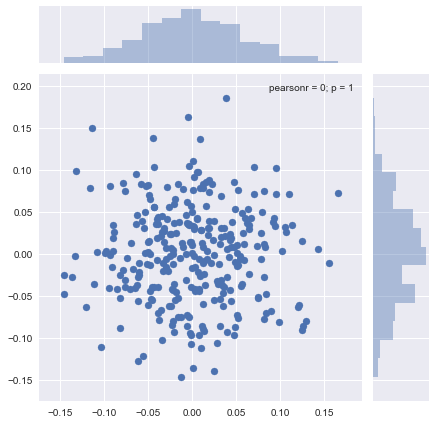

In [9]:
# visualize 2 pca components from U

plt.figure(figsize=(20,5))

pca = PCA(n_components=2)
wv_transformed_U = pca.fit_transform(U)

sns.jointplot(wv_transformed_U[:,0],wv_transformed_U[:,1])


C:\Users\Fujitsu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


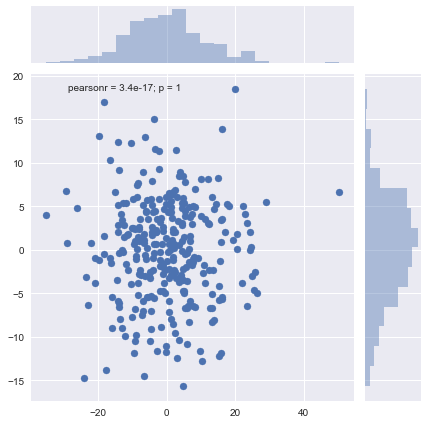

In [10]:
#visualize 2 pca components frpm eigenwords

wv_transformed_eigenwords = pca.fit_transform(eigenwords)

sns.jointplot(wv_transformed_eigenwords[:,0],wv_transformed_eigenwords[:,1])

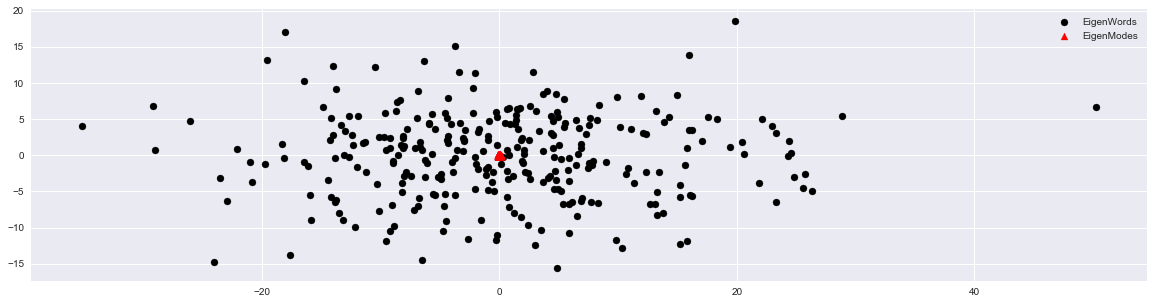

In [11]:
plt.figure(figsize=(20,5))

wv_transformed_eigenwords = pca.fit_transform(eigenwords)
plt.scatter(wv_transformed_eigenwords[:,0],wv_transformed_eigenwords[:,1],c='k',label='EigenWords')

wv_transformed_U = pca.fit_transform(U)
plt.scatter(wv_transformed_U[:,0],wv_transformed_U[:,1],c='r',marker='^',label='EigenModes')

plt.legend()

In [12]:
# This function computes the cosine similarity between vectors u and v

def cosine(u, v):
    cos = np.dot(u, v)/(np.linalg.norm(u) * np.linalg.norm(v))
    
    return cos 

In [13]:
# This function returns the word corresponding to the nearest neighbor vector of x

def nearest_neighbor(x, word_vectors):
    best_score = -1.0
    best_word = None    
    for word, v in word_vectors.items():
        score = cosine(x, v)
        if score > best_score:
            best_score = score
            best_word = word 
            
    return best_word


In [14]:
# return the nearest neighbors of eigen modes(U matrix) in word vectors

best_words = []
for col in range(300):
    best_words.append(nearest_neighbor(np.transpose(U[0:300,col]),word_vectors))
    
print('The best nearest words for Eigen modes in word vectors are:')
print(' ')
print(best_words)
    

The best nearest words for Eigen modes in word vectors are:
 
['that', 'population_density_blank', 'frances', 'neighbouring', 'surface', 'microsoft', 'classical', 'serbia', 'multimedia', 'here', 'diverse', 'pitchers', 'cia', 'vs', 'nagar', 'maría', 'downtown', 'imported', 'honors', 'rounded', 'fencing', 'powder', 'abortion', 'pillars', 'discovers', 'unveiled', 'wards', 'deportivo', 'ambassadors', 'listen', 'percussion', 'maintenance', 'treatise', 'villains', 'wei', '_state', 'breakthrough', 'exceptional', 'petition', 'reputation', 'pronunciation', 'souls', 'sunk', 'rovers', 'freedom', 'portions', 'traveling', 'falcon', 'dining', 'timezone', 'indefinitely', 'output', 'neologism', 'displacement', 'accessdate', 'rom', 'com/search', 'notre', 'travels', 'calculated', 'marseille', 'hanna', 'elena', 'animation', 'liberia', 'requested', 'publishes', 'tide', 'prodcode', 'guided', 'connections', 'georges', 'appeal', 'shorts', 'fp', 'sitting', 'trains', 'flute', 'bas', 'holdings', 'canal', 'trade




To make sense from the cell above: I don't really know how construct words from vector(there is no vec2word) in order to see what are the most dominant words in U matrix, so insteed I did my best and found the nearset words in words verctors to the dominant words in U.









In [15]:
# remmeber the words we previously deleted from our eigen words dataset [',' '.' 'the']
# can we construct them usig compressed informations presented by eigen modes (U matrix)?
# let's construct the word '.' which was left out when we compute the svd decomposition
# R is number of modes we are willing to take from eigen modes (U matrix)

R = [10,30,60,90,120,150,180,210,240,270,300]

for r in R:
    #alpha contain compressed information about the word
    alpha = np.dot(np.transpose(U[0:300,:r]), np.transpose(word_vectors[',']))
                   
    #Project alpha on u, so we can what's word is projected is it same word which has been deleted from eigenwords
    x_hat = np.dot(U[0:300,:r],alpha)
    
    print('At rank %i the word is :'%(r))
    print(nearest_neighbor(x_hat,word_vectors))
    print(' ')
    


At rank 10 the word is :
and
 
At rank 30 the word is :
,
 
At rank 60 the word is :
,
 
At rank 90 the word is :
,
 
At rank 120 the word is :
,
 
At rank 150 the word is :
,
 
At rank 180 the word is :
,
 
At rank 210 the word is :
,
 
At rank 240 the word is :
,
 
At rank 270 the word is :
,
 
At rank 300 the word is :
,
 


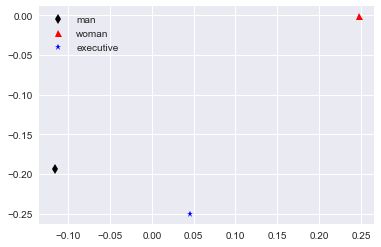

In [16]:
#check the bais in the eigenwords using only the compressed information (alpha)

alpha_man = np.dot(np.transpose(U[0:300,10:12]), np.transpose(word_vectors['man']))
alpha_woman = np.dot(np.transpose(U[0:300,10:12]), np.transpose(word_vectors['woman']))
alpha_executive = np.dot(np.transpose(U[0:300,10:12]), np.transpose(word_vectors['executive']))

plt.plot(alpha_man[0,],alpha_man[1,],'d',color='k',label='man')
plt.plot(alpha_woman[0,],alpha_woman[1,],'^',color='r',label='woman')
plt.plot(alpha_executive[0,],alpha_executive[1,],'*',color='b',label='executive')

plt.legend()

In [17]:
# This function return the words d, such that a:b and c:d verifies the same relation
# compute it, in the compressed domain

def analogy(a, b, c,eigenmodes,word_vectors):
    
    va = np.dot(np.transpose(eigenmodes), np.transpose(word_vectors[a]))
    vb = np.dot(np.transpose(eigenmodes), np.transpose(word_vectors[b]))
    vc = np.dot(np.transpose(eigenmodes), np.transpose(word_vectors[c]))
    
    va = va/np.linalg.norm(va)
    vb = vb/np.linalg.norm(vb)
    vc = vc/np.linalg.norm(vc)
    analogy_word = np.dot(eigenmodes,((vb - va) + vc))
    
    return nearest_neighbor(analogy_word, word_vectors)

In [18]:
R = [10,30,60,90,120,150,180,210,240,270,300]
for r in R:
    print('')
    print('france - paris + rome = ' + analogy('paris', 'france', 'rome', U[0:300,0:r],word_vectors))


france - paris + rome = morocco

france - paris + rome = portugal

france - paris + rome = italy

france - paris + rome = italy

france - paris + rome = italy

france - paris + rome = italy

france - paris + rome = italy

france - paris + rome = italy

france - paris + rome = italy

france - paris + rome = italy

france - paris + rome = italy
